# Data Cleansing of the Ames Housing Data

Ames, Iowa is the college town of **Iowa State University**. The Ames housing dataset consists of about $2500$ house sale records between $2006-2010$. Detailed information about the house attributes, along with the sale prices, is recorded in the dataset.

A subset of the **Ames** dataset is hosted on [**Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as an entry-level regression competition. You may visit their site for some information on the meanings of its data columns (the data dictionary).

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import math

In [3]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [4]:
# load the housing price data
dataset = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)

In [5]:
# Review column name, column type, Non-Null count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [4]:
# found 1 duplicate row
dataset[dataset.duplicated()]
dataset.drop_duplicates(inplace=True) # duplicate row removed

In [6]:
# Removed PID since it just and identifier of each row
dataset.drop('PID',axis=1, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [41]:
# List of columns with NaN
columns_null = pd.DataFrame(dataset.isnull().sum()) # Columns with NaN
columns_null[columns_null[0]>0].sort_values(0, ascending=False)

,0


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [8]:
# Imputed data into LotFrontage
imputer = KNNImputer(n_neighbors=round(math.sqrt(len(dataset)))) # k -> square root of the number of observations
imputed = imputer.fit_transform(dataset.select_dtypes(include='number')) # calculate values with limited columns
dataset_imputed = pd.DataFrame(imputed, columns=dataset.select_dtypes(include='number').columns) # impute dataset

In [9]:
dataset_imputed['LotFrontage'] = round(dataset_imputed['LotFrontage']) # round values to match existing values

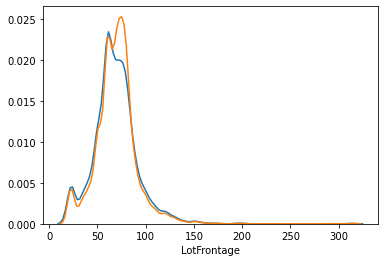

In [10]:
# make sure the distribution of 'LotFrontage' did not change significantly
sns.distplot(dataset['LotFrontage'], hist=False)
sns.distplot(dataset_imputed['LotFrontage'], hist=False)

In [12]:
# Add imputed values to orignal dataset
dataset['LotFrontage'] = dataset_imputed['LotFrontage']

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [14]:
# Looking for consistency among the Bsm columns.
# After researching all the Bsm columns, concluded it was best
# to replace NaN values with zeros in the following columns
dataset['TotalBsmtSF'].fillna(0, inplace=True)
dataset['BsmtHalfBath'].fillna(0, inplace=True)
dataset['BsmtFullBath'].fillna(0, inplace=True)
dataset['BsmtFinSF1'].fillna(0, inplace=True)
dataset['BsmtFinSF2'].fillna(0, inplace=True)
dataset['BsmtUnfSF'].fillna(0, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [21]:
# Create new index...having trouble locating a particular value in the dataframe
dataset.reset_index(inplace=True)
dataset.drop('index',axis=1, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [13]:
# GarageArea and GarageCars missing values (1 entry). 
dataset[dataset['GarageArea'].isna()].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# filling na with zero
dataset['GarageArea'].fillna(0, inplace=True)
dataset['GarageCars'].fillna(0, inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [25]:
# Electrical -> Replacing missing na with SBrkr (every other house built on 
# same year has Standard Circuit Breakers & Romex (SBrkr))
dataset['Electrical'].fillna("SBrkr", inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [27]:
# replacing NAs in MasVnrType with None and MasVnrArea with zero
dataset['MasVnrArea'].fillna(0, inplace=True)
dataset['MasVnrType'].fillna("None", inplace=True)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [29]:
# BsmtExposure is set to not basement by mistake.It should be set to No Exposure ("No")
dataset[(dataset['BsmtExposure'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")
# We will impute the values manually to No Exposure("No")
dataset.loc[[813,1201],'BsmtExposure']="No"

In [31]:
# BsmtFinType2 is set to no basement by mistake.
dataset[(dataset['BsmtFinType2'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2434,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [32]:
# Replacing NaN with Unf = unfinished (it is only one entry)
dataset.loc[2434,'BsmtFinType2']="Unf"

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [34]:
# GarageType is incorrect, there is no garage.
dataset[(dataset['GarageType']=='Detchd') & (dataset['GarageArea']==0)].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,0.0,0.0,NaN,NaN


In [35]:
# since there is no garage, the GarageType for 433 was set to NaN
dataset.loc[433,'GarageType']="None"

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [36]:
# GarageYrBlt, GarageFinish, GarageQual, and GarageCond are NaN, but there is a Garage
dataset[(dataset['GarageType'].notnull()) & (dataset['GarageFinish'].isna())].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,None,NaN,NaN,0.0,0.0,NaN,NaN
531,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [37]:
# Adding values to one observation with Detached garage
dataset.loc[531,'GarageYrBlt'] = 1910        # Year house was built
dataset.loc[531,'GarageFinish'] = "Unf"
dataset.loc[531,'GarageQual'] = "TA"
dataset.loc[531,'GarageCond'] = "TA"

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [38]:
# Coverting GarageYrBlt to Int64
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype("Int64")

In [40]:
# converting "NA" to zero in the GarageYrBlt column
dataset['GarageYrBlt'].fillna(0, inplace=True)
# filling all NaNs with "NA" (string) (except GarageYrBlt) ---> No garage, No basement, No pool, etc...
dataset.fillna("None", inplace=True)

<br><br>
## Consistency
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [42]:
# Houses updated (YearRemodAdd) before the house construction date
dataset[dataset['YearBuilt']>dataset['YearRemodAdd']][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold
2034,2002,2002,2001,2009


In [43]:
# udpate
dataset.loc[2034,'YearRemodAdd']=2002

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [46]:
# Garage built before the house ?
dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','GarageArea','GarageType']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold,GarageArea,GarageType


In [45]:
# Updated GarageYrBlt with YearBuilt when the GarageYrBlt is before the house YearBuilt
new_years = pd.DataFrame(dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)]['YearBuilt'])
new_years.columns = ['GarageYrBlt']
dataset.update(new_years)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [30]:
# Write cleaned dataset to csv file
dataset.to_csv('../ariel/Price_Data_cleaned.csv', index=False)

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

In [32]:
# Team decided the following columns are not needed
# columns_to_remove = ['MSSubClass','Street','LotShape','LandContour','LandSlope','GarageYrBlt','GarageArea','MoSold','YrSold','SaleType','SaleCondition']
columns_to_remove = ['MSSubClass','Street','LotShape','LandContour','LandSlope','GarageYrBlt','GarageArea','MoSold','YrSold','SaleType','SaleCondition']
dataset.drop(columns=columns_to_remove, inplace=True)

In [33]:
dataset.to_csv('../ariel/Price_Data_cleaned_reduced.csv', index=False)